## Simple Static Volume Example

From the OpenSE Cookbook, [Simple Static Roll Up Pattern](https://mms.openmbee.org/alfresco/mmsapp/mms.html#/projects/PROJECT-ID_2_2_17_7_33_25_AM_3ccfaf88_159fe0d7ba9__7d4e_cae_tw_jpl_nasa_gov_127_0_0_1/master/documents/_18_5_2_e64033a_1513278979739_556269_28755/views/_18_0_6_baa02e2_1488179002585_271114_52894)

In [11]:
package SimpleStaticVolumeExample{
    package Analysis{
        import ScalarValues::Real;
        import ScalarFunctions::*;
        import Structure::*;

        block AnalysisContext{
            part subsystem : SubsystemWithVolume[0..*];

            value offset : Real = 0.0;
            value totalVolume : Real;
                
            constraint sum : TotalChildren(
                child = SubsystemWithVolume::volume, 
                total = totalVolume,
                offset = offset);
        }

        constraint def TotalChildren(child : Real[0..*], total : Real, offset : Real){
            total = sum(child) + offset;
        }
    }

    package Structure{
        import ScalarValues::Real;
        import Analysis::*;
        
        block SubsystemWithVolume{
            value volume : Real;
        }

        block ComponentA :> SubsystemWithVolume;
        block ComponentB :> SubsystemWithVolume;
        block ComponentC :> SubsystemWithVolume;
        block ComponentD :> SubsystemWithVolume;

        individual def analysisContext :> AnalysisContext;
        
        individual analysisExample : analysisContext{
            block componentA specializes ComponentA{
                :>> volume = 10.0;
            }
            block componentB specializes ComponentB{
                :>> volume = 8.0;
            }
            block componentC specializes ComponentC{
                :>> volume = 2.5;
            }
            block componentD specializes ComponentD{
                :>> volume = 9.0;
            }
        }
    }
}

Package SimpleStaticVolumeExample (20d157bb-690e-4c98-afa1-25f98b2cfaae)


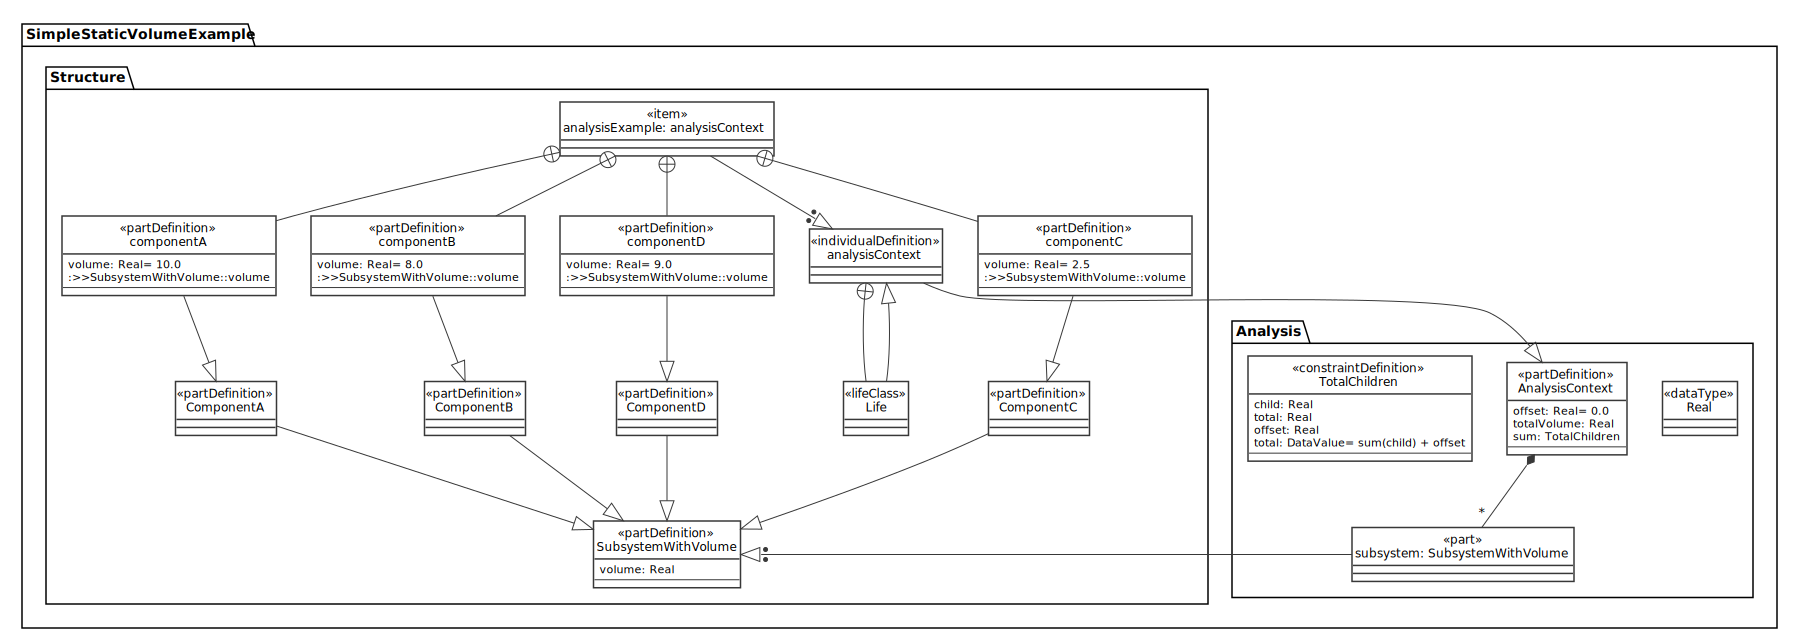

In [13]:
%viz --view=Default SimpleStaticVolumeExample